In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn import svm
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns


In [28]:
df = pd.read_csv(r"C:\Users\Álvaro\Final-project\Data\data.csv")

In [29]:
df["region"].replace(' ', '_', regex=True, inplace=True)

In [30]:
df = df[~df['region'].isin(["Ile-de-France","(not_set)","Occitanie","England","Bogota","Bavaria","North_Rhine-Westphalia","Porto_District","Santiago_Metropolitan_Region","Morelos","Melilla","Scotland","Andorra_la_Vella","Zulia","Prague","Lombardy","Hessen","New_York","Capital_District","North_Holland","Occitania","Azuay","Cartago_Province","Utrecht","New_Hampshire","Pays_de_la_Loire","Georgia","Santa_Fe_Province","Buenos_Aires","Rio_Grande","Vienna"])]


In [31]:
df2 = df[[ 'categorySlug', 'region', 'RC', 'Comercio', 'sale',"source","session_count_email","session_count_userId","quote","sessions"]]

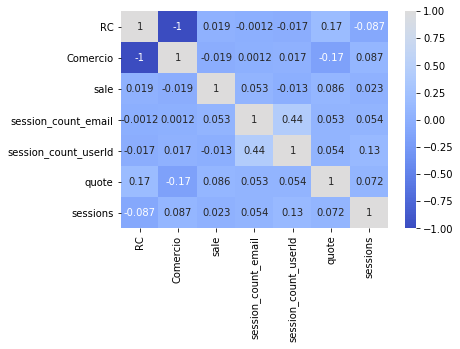

In [32]:
sns.heatmap(df2.corr(), cmap="coolwarm", annot=True, center=True)

In [33]:
df2=df2.dropna()

In [34]:
def r2(rf, X_train, y_train):
    return r2_score(y_train, rf.predict(X_train))

perm_imp_rfpimp = permutation_importances(rf, X_train, y_train, r2)

In [35]:
def get_dummies(df, varlist):
    for var in varlist:
        df_slice = pd.get_dummies(df[var])
        df = pd.concat([df.drop(var, axis =1), df_slice], axis =1)
    return df

In [36]:
categorical_list = ["categorySlug", "region","source"]

In [37]:
X = df2.drop(columns='sale')
X = get_dummies(X, categorical_list)
y = df2['sale']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [38]:
df2['sale'].value_counts()

0    3642
1     401
Name: sale, dtype: int64

In [39]:
from imblearn.combine import SMOTEENN 
from imblearn.combine import SMOTETomek

oversamp_undersamp = SMOTETomek(sampling_strategy=0.6) #default sampling strategy
X_train_b, y_train_b = oversamp_undersamp.fit_sample(X_train, y_train)
X_train_b.shape, y_train_b.shape
y_train_b.value_counts()

0    2550
1    1529
Name: sale, dtype: int64

In [40]:
model = RandomForestClassifier()

In [41]:
model.fit(X_train_b, np.ravel(y_train_b)).score(X_test, np.ravel(y_test))

0.7914262159934048

In [42]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [43]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [44]:
rf_random.fit(X_train_b, y_train_b)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   44.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.5min


OSError: [Errno 22] Invalid argument

In [ ]:
print('Random Forest classifier best paramas')
print(rf_random.best_score_)
print(rf_random.best_params_)

In [ ]:
rf_optimal = RandomForestClassifier(n_estimators = 600, min_samples_split = 10,
                                    min_samples_leaf = 1, max_features = 'sqrt', max_depth = 40,
                                    bootstrap = False)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

predictions_train = rf_optimal.predict(X_train_b)
predictions_test = rf_optimal.predict(X_test)
print(classification_report(y_test, predictions_test))
print("accuracy score on test:", accuracy_score(y_test, predictions_test))
print("accuracy on train:", accuracy_score(y_train_b, predictions_train))

In [21]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rf, cv = None, refit = False, n_iter = 50).fit(X_train, y_train)
perm_imp_eli5 = imp_df(X_train.columns, perm.feature_importances_)
plt.plot(perm_imp_eli5)

C:\Users\Álvaro\anaconda3.1\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Álvaro\anaconda3.1\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

C:\Users\Álvaro\anaconda3.1\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


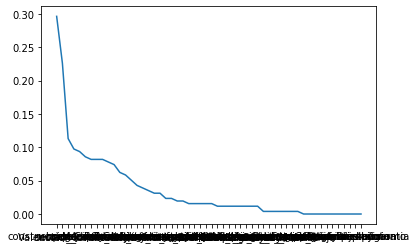

In [22]:
from sklearn.metrics import r2_score
from rfpimp import permutation_importances

def r2(rf, X_train, y_train):
    return r2_score(y_train, rf.predict(X_train))

perm_imp_rfpimp = permutation_importances(rf, X_train, y_train, r2)
plt.plot(perm_imp_rfpimp)